In [25]:
# To Load the CIFAR10 dataset
from keras.datasets.cifar10 import load_data
(trainX, trainy), (testX, testy) = load_data()

print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


In [26]:
from google.colab import drive
drive.mount('/content/drive')
# Used Google Collab for training

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


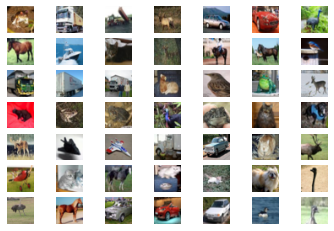

In [27]:
# Plot some part of the dataset to get an idea about it
from matplotlib import pyplot
for i in range(49):
	
	pyplot.subplot(7, 7, 1 + i)
	
	pyplot.axis('off')
	# Plot images
	pyplot.imshow(trainX[i])
pyplot.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 256)       

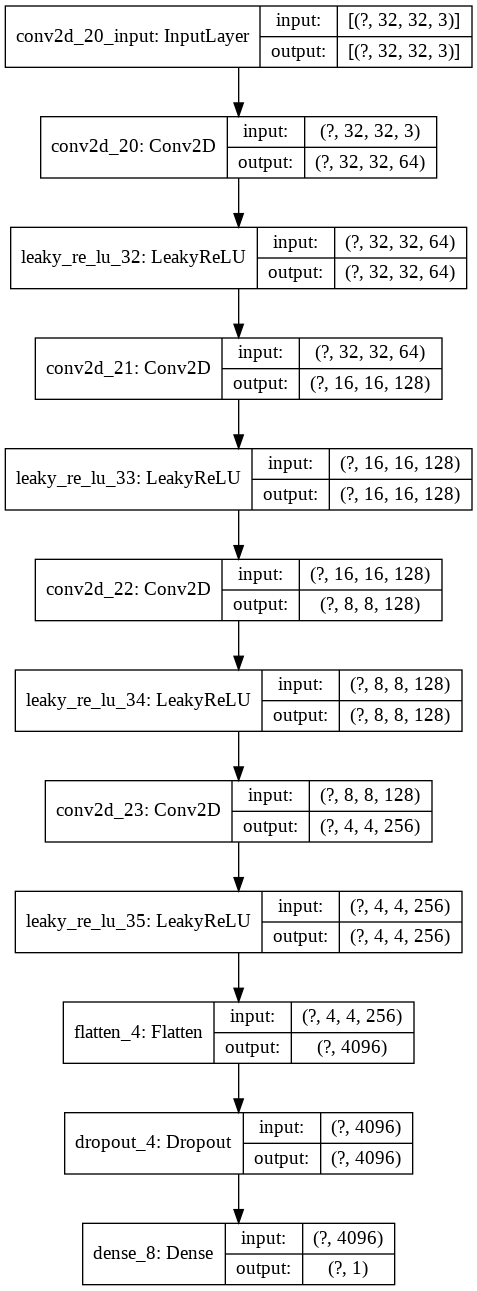

In [28]:
# Define the Discrinator Model

from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model


def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# Sequential Model Definition
	
	# Downsample multiple times with Conv2D using LeakyRelU 
	# Avoids using Pooling, instead uses Strides
	    
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	# Flatten, Add Dropout and Final Sigmoid Layer
	
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model


model = define_discriminator()

model.summary()

# plot the model for better Visualization
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
# load the CIFAR 10 Train Images
def load_real_samples():
	# load cifar10 dataset
	(trainX, _), (_, _) = load_data()
	# convert from unsigned ints to floats
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

In [30]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [31]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(32 * 32 * 3 * n_samples)
	# update to have the range [-1, 1]
	X = -1 + X * 2
	# reshape into a batch of color images
	X = X.reshape((n_samples, 32, 32, 3))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [32]:
# train the discriminator model a bit initially

def train_discriminator(model, dataset, n_iter=20, n_batch=128):
	half_batch = int(n_batch / 2)
	
	for i in range(n_iter):
		# Get real X, Y
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# Get fake X, Y
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [33]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=8% fake=14%
>2 real=77% fake=44%
>3 real=77% fake=77%
>4 real=86% fake=98%
>5 real=83% fake=100%
>6 real=88% fake=100%
>7 real=80% fake=100%
>8 real=84% fake=100%
>9 real=89% fake=100%
>10 real=86% fake=100%
>11 real=98% fake=100%
>12 real=98% fake=100%
>13 real=98% fake=100%
>14 real=98% fake=100%
>15 real=100% fake=100%
>16 real=98% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=97% fake=100%
>20 real=98% fake=100%


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 16, 16, 128)     

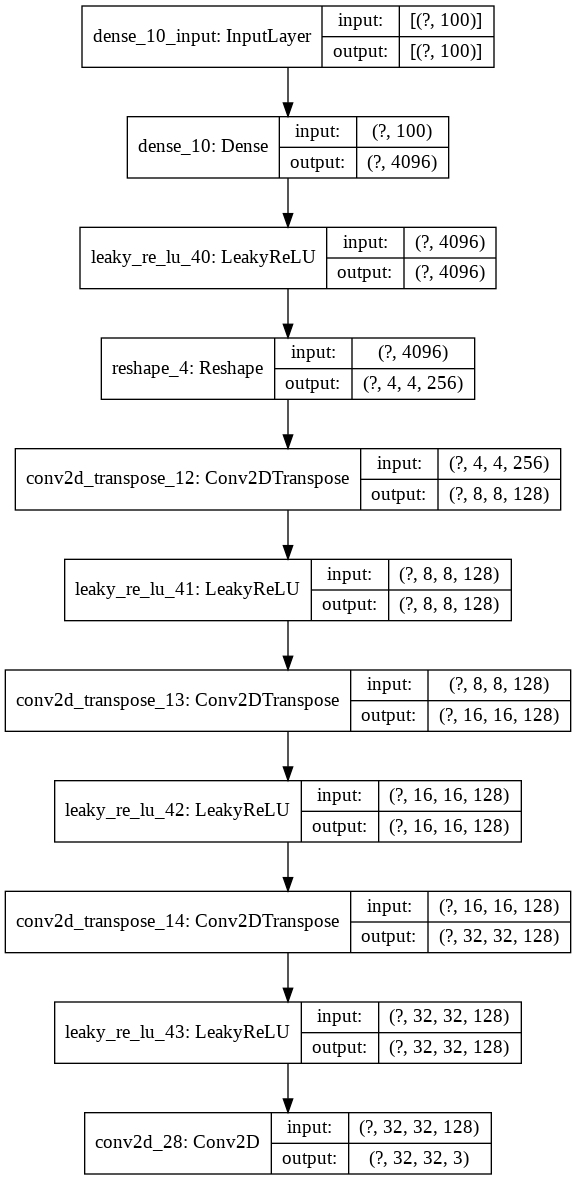

In [34]:
# Define the Generator

from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot


def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	# upsample to 32x32x128 then downsample to 32x32x3
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [35]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [36]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

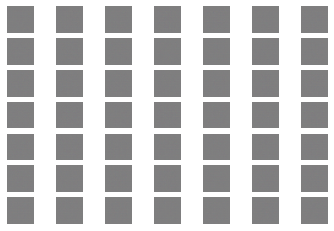

In [37]:
# Visualize Intially Generated Images 

# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i])
# show the figure
pyplot.show()

# Final Model

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_15 (Sequential)   (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_14 (Sequential)   (None, 1)                 522497    
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


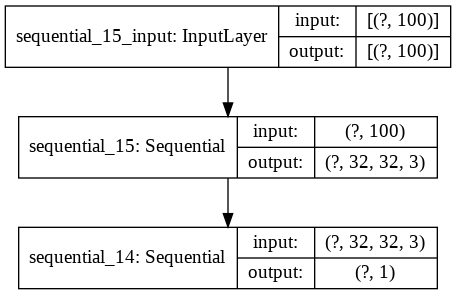

In [38]:
# Creating the Three Models in the GAN

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from tqdm import trange

# Get the Discriminator Model

def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# Sequential Model Definition
	
	# Downsample multiple times with Conv2D using LeakyRelU 
	# Avoids using Pooling, instead uses Strides
	    
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	# Flatten, Add Dropout and Final Sigmoid Layer
	
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# Get the generator model

def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	# upsample to 32x32x128 then downsample to 32x32x3
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model for better Visualization
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [48]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [49]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

In [50]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
    t = trange(n_epochs, desc='Iteration: Loss: ', leave=True,position=0)
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in t:
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            
            t.set_description('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 10 == 1:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [51]:
train(g_model,d_model,gan_model,dataset,latent_dim)

>1, 390/390, d1=0.654, d2=0.523 g=1.292:   0%|          | 0/200 [00:43<?, ?it/s]

>Accuracy real: 69%, fake: 85%


>11, 390/390, d1=0.631, d2=0.721 g=0.798:   5%|▌         | 10/200 [07:50<2:14:41, 42.53s/it]

>Accuracy real: 58%, fake: 63%


>21, 390/390, d1=0.634, d2=0.680 g=0.796:  10%|█         | 20/200 [14:49<2:05:10, 41.72s/it]

>Accuracy real: 61%, fake: 65%


>31, 390/390, d1=0.684, d2=0.694 g=0.806:  15%|█▌        | 30/200 [21:58<2:01:01, 42.72s/it]

>Accuracy real: 47%, fake: 82%


>41, 390/390, d1=0.588, d2=0.657 g=0.816:  20%|██        | 40/200 [29:07<1:54:11, 42.82s/it]

>Accuracy real: 48%, fake: 83%


>51, 390/390, d1=0.710, d2=0.614 g=0.913:  25%|██▌       | 50/200 [36:12<1:45:15, 42.10s/it]

>Accuracy real: 48%, fake: 87%


>61, 390/390, d1=0.692, d2=0.599 g=0.897:  30%|███       | 60/200 [43:08<1:37:03, 41.59s/it]

>Accuracy real: 48%, fake: 81%


>71, 390/390, d1=0.669, d2=0.682 g=0.922:  35%|███▌      | 70/200 [50:03<1:29:50, 41.46s/it]

>Accuracy real: 48%, fake: 84%


>81, 390/390, d1=0.626, d2=0.692 g=0.930:  40%|████      | 80/200 [57:01<1:23:56, 41.97s/it]

>Accuracy real: 49%, fake: 83%


>91, 390/390, d1=0.652, d2=0.718 g=0.951:  45%|████▌     | 90/200 [1:04:05<1:17:48, 42.44s/it]

>Accuracy real: 67%, fake: 83%


>101, 390/390, d1=0.774, d2=0.582 g=1.007:  50%|█████     | 100/200 [1:11:10<1:10:35, 42.36s/it]

>Accuracy real: 50%, fake: 82%


>111, 390/390, d1=0.625, d2=0.552 g=1.012:  55%|█████▌    | 110/200 [1:18:07<1:02:26, 41.63s/it]

>Accuracy real: 74%, fake: 85%


>121, 390/390, d1=0.593, d2=0.629 g=1.041:  60%|██████    | 120/200 [1:25:00<54:53, 41.17s/it]

>Accuracy real: 71%, fake: 89%


>131, 390/390, d1=0.662, d2=0.534 g=1.134:  65%|██████▌   | 130/200 [1:31:53<48:00, 41.15s/it]

>Accuracy real: 58%, fake: 94%


>141, 390/390, d1=0.585, d2=0.522 g=1.125:  70%|███████   | 140/200 [1:38:47<41:16, 41.28s/it]

>Accuracy real: 63%, fake: 88%


>151, 390/390, d1=0.586, d2=0.501 g=1.221:  75%|███████▌  | 150/200 [1:45:40<34:22, 41.24s/it]

>Accuracy real: 61%, fake: 91%


>161, 390/390, d1=0.518, d2=0.447 g=1.117:  80%|████████  | 160/200 [1:52:33<27:33, 41.33s/it]

>Accuracy real: 70%, fake: 87%


>171, 390/390, d1=0.502, d2=0.473 g=1.298:  85%|████████▌ | 170/200 [1:59:28<20:36, 41.22s/it]

>Accuracy real: 69%, fake: 91%


>179, 230/390, d1=0.463, d2=0.533 g=1.186:  89%|████████▉ | 178/200 [2:04:45<15:08, 41.29s/it]

Buffered data was truncated after reaching the output size limit.

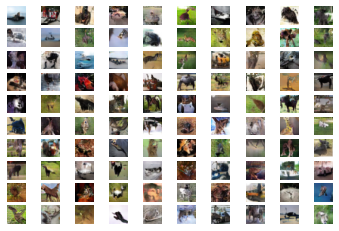

In [52]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# plot the generated images
def create_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()
 
# load model
model = load_model('generator_model_191.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 10)